In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
#load dataset

dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
dataset.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [6]:
dataset.replace({'Male':1,'Female':0},inplace=True)

In [7]:
dataset.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


In [8]:
dataset.shape

(400, 5)

In [9]:
X = dataset[['Age','EstimatedSalary']]
Y = dataset['Purchased']

In [10]:
X.head()
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

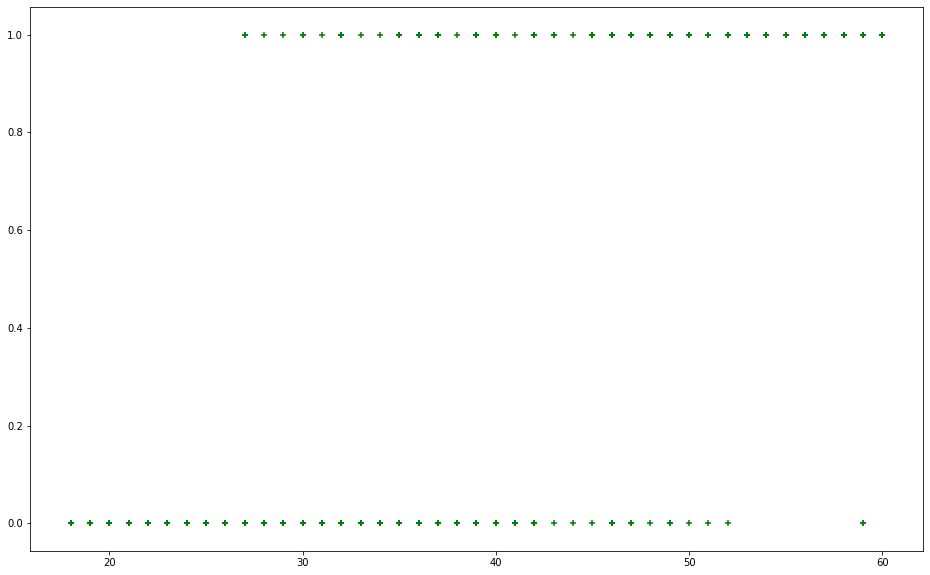

In [28]:
# Analysis relation between variables
plt.figure(figsize=(16,10))
plt.scatter(dataset['Age'],dataset['Purchased'],color ='green', marker='+')

plt.show()

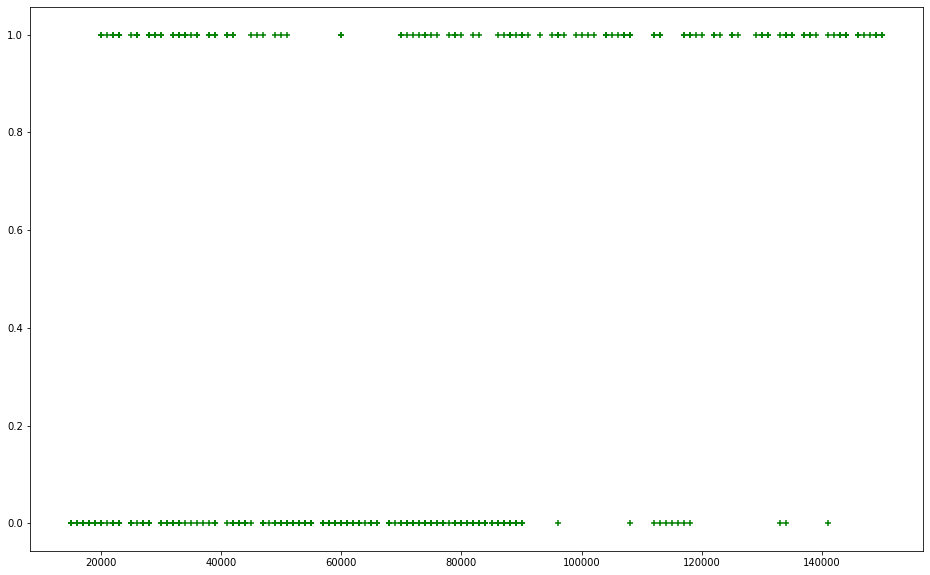

In [29]:
# Analysis relation between variables
plt.figure(figsize=(16,10))
plt.scatter(dataset['EstimatedSalary'],dataset['Purchased'],color ='green', marker='+')

plt.show()

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.33, random_state=5)

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(268, 2)
(132, 2)
(268,)
(132,)


In [13]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
#defining Logistic
lm = LogisticRegression(random_state=0)
lm.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# Predicting the Test set results
pred_data = lm.predict(x_test)

In [16]:
#Performance Analysis using confusion matrix 
print(sklearn.metrics.accuracy_score(y_test,pred_data))
print(sklearn.metrics.confusion_matrix(y_test,pred_data))

0.8560606060606061
[[79  7]
 [12 34]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


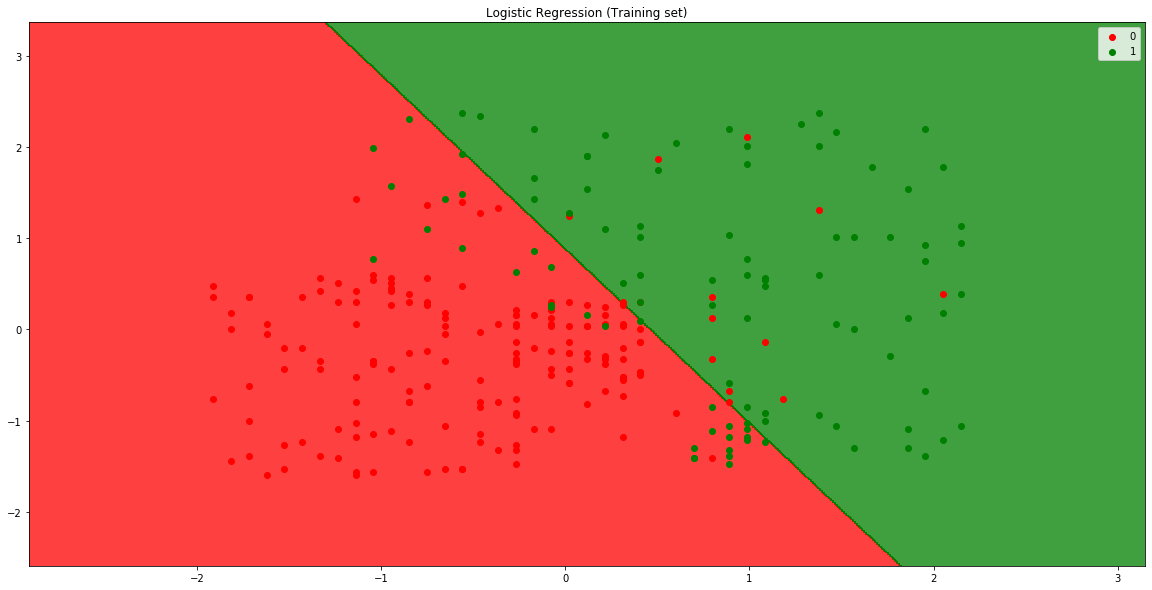

In [24]:
#Visualizing the Training set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
plt.figure(figsize=(20,10))
x1, y1 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1, step = 0.01),
                    np.arange(start = x_set[:,1].min()-1, stop = x_set[:,1].max()+1, step = 0.01))
plt.contourf(x1,y1, lm.predict(np.array([x1.ravel(),y1.ravel()]).T).reshape(x1.shape),
            alpha =0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(y1.min(),y1.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
               c = ListedColormap(('red','green'))(i), label =j)
plt.title('Logistic Regression (Training set)')

plt.legend()
plt.show()